Data are tested using Gradient Boosting Classifier 

Initializing and training the Gradient Boosting model...
Gradient Boosting model training completed.
Confusion Matrix (Gradient Boosting):
[[2977   17]
 [1806    0]]
Accuracy: 0.6202083333333334
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.99      0.77      2994
         1.0       0.00      0.00      0.00      1806

    accuracy                           0.62      4800
   macro avg       0.31      0.50      0.38      4800
weighted avg       0.39      0.62      0.48      4800

True Positives (TP): 0 (0.00%)
True Negatives (TN): 2977 (62.02%)
False Positives (FP): 17 (0.35%)
False Negatives (FN): 1806 (37.62%)
GBC model saved as C:/Users/madhu/Desktop/individual_project/outputs/output_test/GBC_output\gbc_model_human_detection.joblib
Scaler file saved as C:/Users/madhu/Desktop/individual_project/outputs/output_test/GBC_output\scaler_gbc_human_detection.joblib


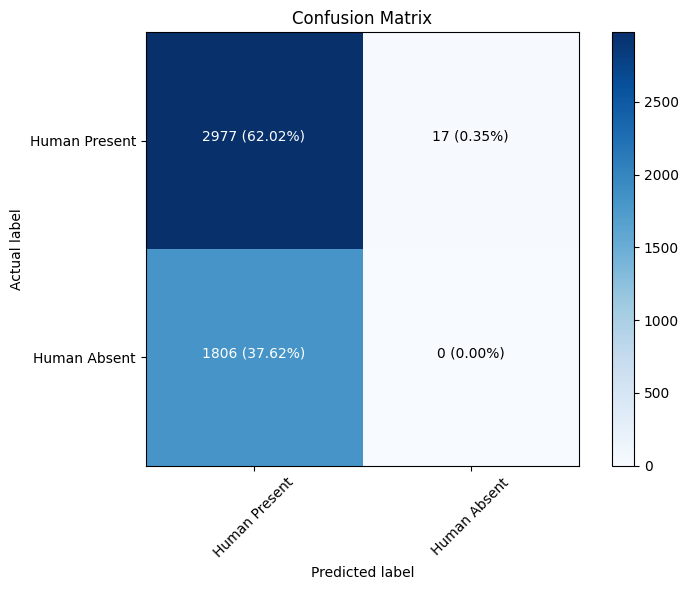

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from joblib import dump
import itertools
from sklearn.metrics import classification_report  # Import the classification_report function

def train_and_evaluate_model(combined_human_path, labels_path):
    # Load the data 
    combined_human = np.load(combined_human_path)
    labels = np.load(labels_path)

    # Combine all features into a single array
    X = combined_human
    y = labels

    # Split the data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train Gradient Boosting classifier
    print("Initializing and training the Gradient Boosting model...")
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_scaled, y_train)
    print("Gradient Boosting model training completed.")

    # Predict on the test set
    test_pred = gb_model.predict(X_test_scaled)

    # Calculate and display metrics
    conf_mat = metrics.confusion_matrix(y_test, test_pred)
    accuracy = metrics.accuracy_score(y_test, test_pred)
    precision = metrics.precision_score(y_test, test_pred)
    recall = metrics.recall_score(y_test, test_pred)
    f1_score = metrics.f1_score(y_test, test_pred)

    print("Confusion Matrix (Gradient Boosting):")
    print(conf_mat)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, test_pred))  # Print the classification report

    # Calculate TP, TN, FP, FN and their percentages
    TN, FP, FN, TP = conf_mat.ravel()
    total = TN + FP + FN + TP

    tp_percentage = TP / total * 100
    tn_percentage = TN / total * 100
    fp_percentage = FP / total * 100
    fn_percentage = FN / total * 100

    print(f"True Positives (TP): {TP} ({tp_percentage:.2f}%)")
    print(f"True Negatives (TN): {TN} ({tn_percentage:.2f}%)")
    print(f"False Positives (FP): {FP} ({fp_percentage:.2f}%)")
    print(f"False Negatives (FN): {FN} ({fn_percentage:.2f}%)")

    # Save the trained model and scaler output
    data_output_path = "C:/Users/madhu/Desktop/individual_project/outputs/output_test/GBC_output"
    os.makedirs(data_output_path, exist_ok=True)

    model_file_path = os.path.join(data_output_path, 'gbc_model_human_detection.joblib')
    dump(gb_model, model_file_path)
    print(f"GBC model saved as {model_file_path}")

    scaler_file_path = os.path.join(data_output_path, 'scaler_gbc_human_detection.joblib')
    dump(scaler, scaler_file_path)
    print(f"Scaler file saved as {scaler_file_path}")

    # Plot the confusion matrix
    confusion_mat = np.array([[TN, FP], [FN, TP]])
    class_names = ['Human Present', 'Human Absent']

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Add text to each cell
    thresh = confusion_mat.max() / 2
    for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
        plt.text(j, i, f"{confusion_mat[i, j]} ({conf_mat[i, j]/total*100:.2f}%)", 
                 horizontalalignment='center', 
                 color='white' if confusion_mat[i, j] > thresh else 'black')
    
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Define the data folder path 
data_folder = "C:/Users/madhu/Desktop/individual_project/outputs/output_test/Labels_output"
combined_human_path = os.path.join(data_folder, 'combined_test_fft_data.npy')
labels_path = os.path.join(data_folder, 'combined_test_labels.npy')

# Call the function to train and evaluate the model
train_and_evaluate_model(combined_human_path, labels_path)
